<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/HierarchicalClusteringFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

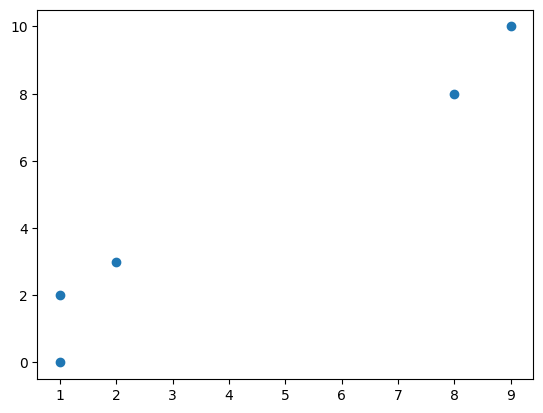

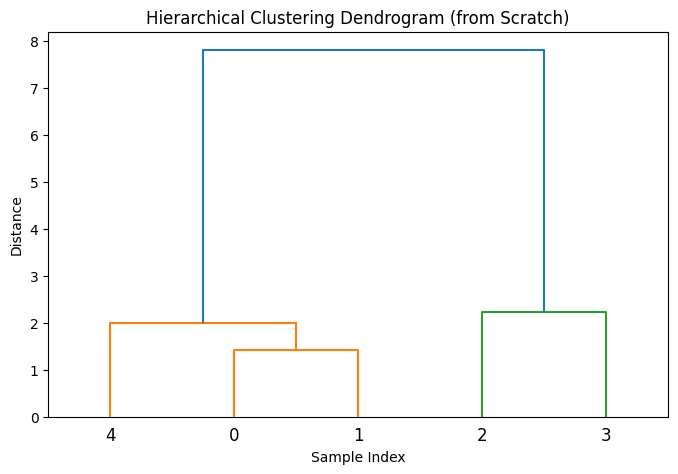

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
# import ipdb

class HierarchicalClustering:
    def __init__(self, linkage='single'):
        self.linkage = linkage
        self.linkage_matrix = []

    def _euclidean_distance(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2)**2))

    def _get_cluster_distance(self, c1_indices, c2_indices, data):
        # Calculate distance between two clusters based on linkage
        distances = [self._euclidean_distance(data[i], data[j])
                     for i in c1_indices for j in c2_indices]
        if self.linkage == 'single':
            return min(distances)
        elif self.linkage == 'complete':
            return max(distances)
        return np.mean(distances)

    def fit(self, X):
        n_samples = X.shape[0]
        # Initially, each point is its own cluster
        clusters = {i: [i] for i in range(n_samples)}
        current_cluster_id = n_samples

        # ipdb.set_trace(context = 20)

        # We need (n_samples - 1) merges
        for _ in range(n_samples - 1):
            min_dist = float('inf')
            to_merge = (None, None)

            # Find the two closest clusters
            cluster_ids = list(clusters.keys())
            for i in range(len(cluster_ids)):
                for j in range(i + 1, len(cluster_ids)):
                    id1, id2 = cluster_ids[i], cluster_ids[j]
                    dist = self._get_cluster_distance(clusters[id1], clusters[id2], X)
                    if dist < min_dist:
                        min_dist = dist
                        to_merge = (id1, id2)

            # Record merge for dendrogram: [idx1, idx2, distance, new_cluster_size]
            id1, id2 = to_merge
            new_size = len(clusters[id1]) + len(clusters[id2])
            self.linkage_matrix.append([id1, id2, min_dist, new_size])

            # Create new cluster and remove old ones
            clusters[current_cluster_id] = clusters[id1] + clusters[id2]
            del clusters[id1]
            del clusters[id2]
            current_cluster_id += 1

        return np.array(self.linkage_matrix)

# Example Usage
X = np.array([[1, 2], [2, 3], [8, 8], [9, 10], [1, 0]])
model = HierarchicalClustering(linkage='single')
z = model.fit(X)

plt.scatter(X[:,0], X[:,1])
# 4. Dendrogram Code
plt.figure(figsize=(8, 5))
dendrogram(z)
plt.title("Hierarchical Clustering Dendrogram (from Scratch)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()
